In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob
import tensorflow as tf
import tensorflow.keras.layers as tfl
import os

os.chdir(os.getcwd())
os.getcwd()

In [2]:
images = []
Y = []
count = 0
for i in range(10):
    path = "./handDigitData/"+str(i)+"/*.jpg"
    images += glob(path)
    for x in range(len(images) - count):
        Y.append(i)
    count = len(images)

In [3]:
print(len(images))
print(len(Y))

2062
2062


In [4]:
plt.imread(images[0]).shape

(100, 100, 3)

In [5]:
X = np.empty((0,100,100,3))
for i, a in enumerate(images):
    xi = plt.imread(a)
    if xi.shape == (100, 100, 3):
        X = np.append(X,[xi],axis=0)
    else:
        Y.pop(i)

In [6]:
print(X.shape)
print(len(Y))

(2059, 100, 100, 3)
2059


In [7]:
y = np.zeros((2059,10))
for i in range(2059):
    y[i,Y[i]] = 1.
Y=y
X = X/255

In [8]:
print(X.shape)
print(Y.shape)

(2059, 100, 100, 3)
(2059, 10)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.15, random_state = 42, shuffle = True)

(1750, 100, 100, 3)
(1750, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


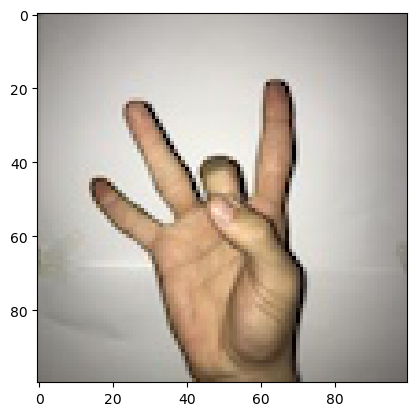

In [10]:
print(x_train.shape)
print(y_train.shape)

plt.imshow(x_train[0])
print(y_train[:5,:])

## Model building

In [78]:
def convolutional_model(input_shape):
    
    input_img = tfl.Input(shape= input_shape)
    
    Z1 = tfl.Conv2D(kernel_size = 4, filters = 8)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size = 8, strides = 8, padding = 'same')(A1)
    Z2 = tfl.Conv2D(filters = 16, kernel_size = 2, padding = "same", strides =1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size = 4, strides = 4, padding = 'same')(A2)
    
    F = tfl.Flatten()(P2)
    O = tfl.Dense(units = 10, activation = 'ReLU')(F)
    model = tf.keras.Model(inputs= input_img, outputs= O)
    
    return model

In [79]:
convo_model= convolutional_model((100,100,3))
convo_model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
convo_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_38 (Conv2D)          (None, 97, 97, 8)         392       
                                                                 
 re_lu_37 (ReLU)             (None, 97, 97, 8)         0         
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 13, 13, 16)        528       
                                                                 
 re_lu_38 (ReLU)             (None, 13, 13, 16)        0         
                                                          

In [80]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(64)
history = convo_model.fit(train_dataset, epochs = 100, validation_data = test_dataset)

Epoch 1/100
28/28 [==============================] - 1s 14ms/step - loss: 5.3581 - accuracy: 0.1120 - val_loss: 4.8465 - val_accuracy: 0.0841
Epoch 2/100
28/28 [==============================] - 0s 11ms/step - loss: 4.8825 - accuracy: 0.0954 - val_loss: 4.8421 - val_accuracy: 0.1780
Epoch 3/100
28/28 [==============================] - 0s 11ms/step - loss: 4.8678 - accuracy: 0.1280 - val_loss: 4.8290 - val_accuracy: 0.1715
Epoch 4/100
28/28 [==============================] - 0s 11ms/step - loss: 4.8471 - accuracy: 0.1623 - val_loss: 4.8068 - val_accuracy: 0.2265
Epoch 5/100
28/28 [==============================] - 0s 11ms/step - loss: 4.5180 - accuracy: 0.2057 - val_loss: 3.4726 - val_accuracy: 0.1780
Epoch 6/100
28/28 [==============================] - 0s 10ms/step - loss: 3.4078 - accuracy: 0.2194 - val_loss: 3.1824 - val_accuracy: 0.2427
Epoch 7/100
28/28 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.3206 - val_loss: nan - val_accuracy: 0.0874
Epoch 8/100


In [71]:
history.history

{'loss': [0.6370572447776794,
  0.6083230972290039,
  0.5834421515464783,
  0.5585346221923828,
  0.5374059677124023,
  0.5162911415100098,
  0.5001444816589355,
  0.48204484581947327,
  0.466399610042572,
  0.4517783224582672,
  0.43737849593162537,
  0.42424124479293823,
  0.4133261740207672,
  0.40049296617507935,
  0.38997653126716614,
  0.38083022832870483,
  0.37028515338897705,
  0.36118993163108826,
  0.35252127051353455,
  0.34415203332901,
  0.3362502157688141,
  0.3277146816253662,
  0.3215153217315674,
  0.3131299614906311,
  0.30723342299461365,
  0.2995249032974243,
  0.29509609937667847,
  0.28653258085250854,
  0.2827555537223816,
  0.2744809091091156,
  0.27059030532836914,
  0.2641240060329437,
  0.2599903345108032,
  0.2541615068912506,
  0.2496730089187622,
  0.24345502257347107,
  0.2397160530090332,
  0.23490262031555176,
  0.2307874858379364,
  0.22548723220825195,
  0.22108693420886993,
  0.21711277961730957,
  0.21285152435302734,
  0.20899388194084167,
  0.204

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

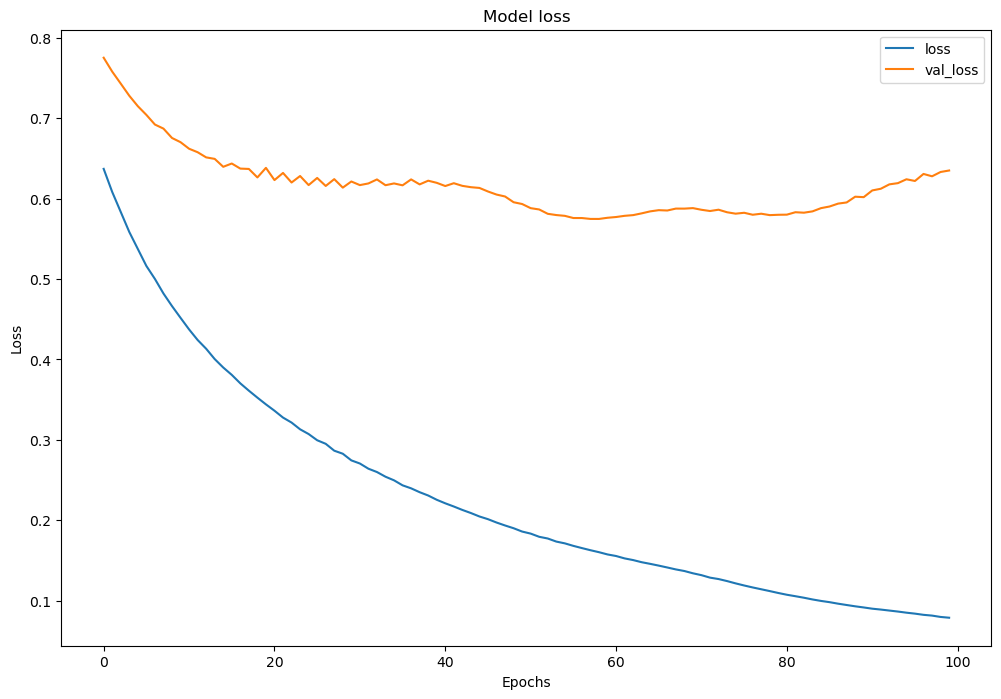

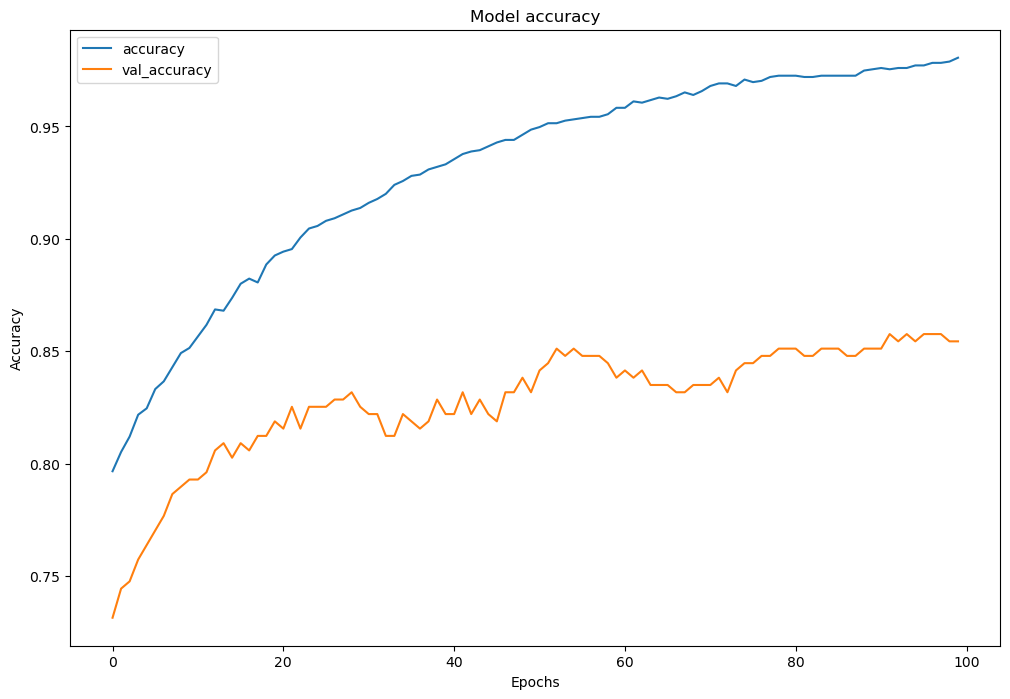

In [72]:
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[["loss","val_loss"]]
df_acc = df_loss_acc[["accuracy","val_accuracy"]]
df_loss.plot(title="Model loss",figsize = (12,8)).set(xlabel = "Epochs",ylabel = "Loss")
df_acc.plot(title = "Model accuracy",figsize = (12,8)).set(xlabel = "Epochs", ylabel = "Accuracy")

In [73]:
type(history)

keras.src.callbacks.History

In [74]:
history.history["loss"][0]

0.6370572447776794

In [110]:
convo_model.save("./Models")

INFO:tensorflow:Assets written to: ./Models\assets


INFO:tensorflow:Assets written to: ./Models\assets


In [111]:
model = tf.keras.models.load_model("./Models")

In [112]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 8)       392       
                                                                 
 re_lu_4 (ReLU)              (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 16)        528       
                                                                 
 re_lu_5 (ReLU)              (None, 13, 13, 16)        0         
                                                           

## Prediction

In [75]:
i = glob("./pred/*.jpg")
#print(i)
x = np.empty((0,100,100,3))
for j in i:
    x = np.append(x,[plt.imread(j)/255], axis = 0)
    #plt.imshow(x)

i = glob("./pred/*.jpg")
x = np.empty((1,100,100,3))
x[0] = plt.imread(i[0])

In [76]:
x.shape

(10, 100, 100, 3)

In [77]:
y = np.argmax(model.predict(x), axis = 1)
print(y)

1/1 [==============================] - 0s 63ms/step
[0 1 2 3 4 5 6 7 8 9]


In [109]:
y = np.argmax(model.predict(x), axis = 1)
print(y)

1/1 [==============================] - 0s 18ms/step
[0 2 6 3 6 5 6 7 8 9]
